In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import xarray as xr
import ghibtools as gh
import tqdm
from params import *
from deform_tools import deform_to_cycle_template

%matplotlib inline

In [52]:
save = True

In [53]:
def tf_cycle_stretch(da, rsp_features, nb_point_by_cycle=1000, inspi_ratio = 0.3):
    # da = 3d da ('raw',freqs * time)
    da_stretch_cycle = None
    for mode in ['raw','normal']:
        clipped_times, times_to_cycles, cycles, cycle_points, deformed_data = deform_to_cycle_template(data = da.loc[mode,:,:].values.T,
                                                                                                       times = da.coords['time'].values , 
                                                                                                       cycle_times=rsp_features[['inspi_time','expi_time']].values, 
                                                                                                       nb_point_by_cycle=nb_point_by_cycle,
                                                                                                       inspi_ratio = inspi_ratio)
        deformed = deformed_data.T    

        for cycle in cycles:
            data_of_the_cycle = deformed[:,cycle*nb_point_by_cycle:(cycle+1)*nb_point_by_cycle]
            if da_stretch_cycle is None:
                da_stretch_cycle = gh.init_da({'normalisation':['raw','normal'],'cycle' : cycles, 'freqs': da.coords['freqs'].values , 'point':np.arange(0,nb_point_by_cycle,1)})
            da_stretch_cycle.loc[mode, cycle, : , :] = data_of_the_cycle
    return da_stretch_cycle

In [54]:
for patient in patients:
    da_tf = xr.load_dataarray(f'../dataarray/da_tf_frontal_{patient}.nc')
    rsp_features = pd.read_excel(f'../df_analyse/resp_features_{patient}.xlsx', index_col = [0])
    da_stretch_cycle = tf_cycle_stretch(da = da_tf , rsp_features = rsp_features)
    if save:
        da_stretch_cycle.to_netcdf(f'../dataarray/da_tf_frontal_stretched_{patient}.nc')

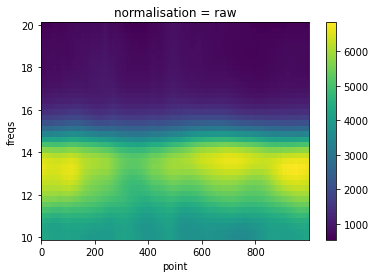

In [57]:
da_stretch_cycle.mean('cycle').loc['raw',:,:].plot()

In [58]:
da_stretch_cycle

<xarray.DataArray (normalisation: 2, cycle: 1689, freqs: 40, point: 1000)>
array([[[[ 2.92294648e+04,  2.89118703e+04,  2.85942758e+04, ...,
           5.44415746e+02,  5.47561130e+02,  5.50794726e+02],
         [ 2.77599092e+04,  2.74612554e+04,  2.71626016e+04, ...,
           4.28928038e+02,  4.40711241e+02,  4.53202484e+02],
         [ 2.63772041e+04,  2.60979124e+04,  2.58186206e+04, ...,
           3.50753728e+02,  3.68559797e+02,  3.87579945e+02],
         ...,
         [ 8.48733496e+03,  8.40065090e+03,  8.31396684e+03, ...,
           1.91507030e+02,  1.99650836e+02,  2.08520378e+02],
         [ 8.42399951e+03,  8.34210417e+03,  8.26020883e+03, ...,
           1.69795357e+02,  1.77303795e+02,  1.85428596e+02],
         [ 8.31606665e+03,  8.23765988e+03,  8.15925311e+03, ...,
           1.67917927e+02,  1.74351555e+02,  1.81251747e+02]],

        [[ 5.54191174e+02,  5.57598468e+02,  5.61209144e+02, ...,
           3.12535332e+02,  3.13944596e+02,  3.15447651e+02],
         [ 4.67000877e+02,  4.80931710e+02,  4.97345812e+02, ...,
           1.54195395e+02,  1.55316365e+02,  1.56518998e+02],
         [ 4.08841468e+02,  4.30334876e+02,  4.56176115e+02, ...,
           7.94856412e+01,  7.99770722e+01,  8.05137259e+01],
...
         [-2.50464486e-01, -2.49168455e-01, -2.47802606e-01, ...,
          -3.63022187e-01, -3.62466093e-01, -3.61890455e-01],
         [-2.70996433e-01, -2.69872022e-01, -2.68679285e-01, ...,
          -3.51372862e-01, -3.51082122e-01, -3.50785544e-01],
         [-2.92533160e-01, -2.91655087e-01, -2.90716919e-01, ...,
          -3.42630529e-01, -3.42731685e-01, -3.42843831e-01]],

        [[ 2.15734520e+00,  2.18982176e+00,  2.22544106e+00, ...,
          -2.46082695e-01, -2.41063248e-01, -2.35815406e-01],
         [ 1.88295354e+00,  1.91478252e+00,  1.94928699e+00, ...,
          -2.02702804e-01, -1.97725213e-01, -1.92521768e-01],
         [ 1.52879987e+00,  1.55795801e+00,  1.58901441e+00, ...,
          -1.50320364e-01, -1.45642771e-01, -1.40758885e-01],
         ...,
         [-3.61239903e-01, -3.60580274e-01, -3.59811726e-01, ...,
          -3.86007318e-01, -3.86072751e-01, -3.86138229e-01],
         [-3.50466586e-01, -3.50145097e-01, -3.49793245e-01, ...,
          -3.92168594e-01, -3.92071211e-01, -3.91962850e-01],
         [-3.42998106e-01, -3.43157803e-01, -3.43382577e-01, ...,
          -3.94971019e-01, -3.94761437e-01, -3.94532146e-01]]]])
Coordinates:
  * normalisation  (normalisation) <U6 'raw' 'normal'
  * cycle          (cycle) int64 0 1 2 3 4 5 6 ... 1683 1684 1685 1686 1687 1688
  * freqs          (freqs) float64 10.0 10.26 10.51 10.77 ... 19.49 19.74 20.0
  * point          (point) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999